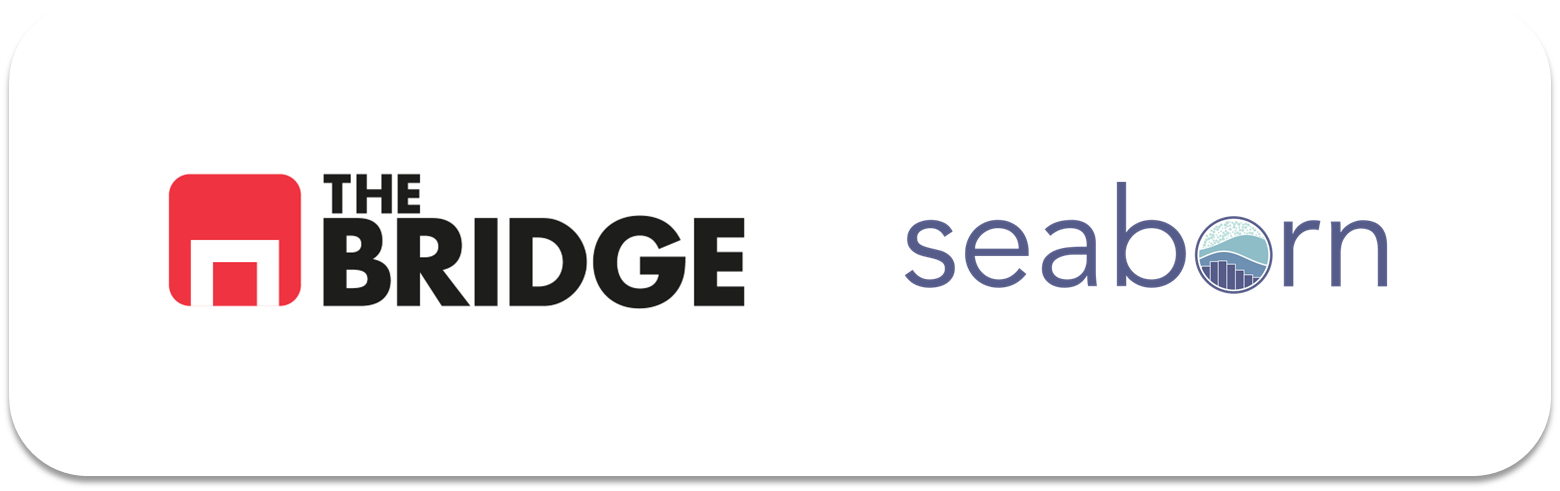

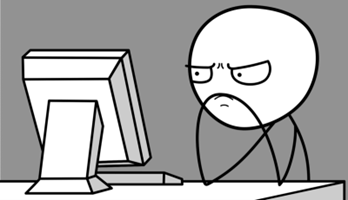

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date'])
df_bitcoin.set_index('date', drop = True, inplace = True)

### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [3]:
# Es la de la liberia bootcampviztools.py MODIFICADA

def plot_multiple_categorical_distributions(df,
                                            categorical_columns,
                                            *, 
                                            relative = False, 
                                            show_values = True, 
                                            rotation = 45, 
                                            palette = 'viridis'
                                            ) -> None:
    '''
    Plot a bar-graphs matrix, with 2 columns and the rows needed to plot the
    `absolute` or `relative` frequency from the categorical columns of `df`.
    
    Parameters
    ----------
    df : pandas.DataFrame
        pandas.DataFrame

    categorical_columns : list
        Categorical columns   

    relative : bool, optional
        If True, it plots Relative Frecuency.
        
    show_values : bool, optional
        If True, show numerical values over each bar.
        
    rotation : int, optional
        X-Tick label rotation.
        
    palette : None, palette name, list, or dict, optional
        Colors to use for the different levels of the hue variable. 
        Should be something that can be interpreted by color_palette(), 
        or a dictionary mapping hue levels to matplotlib colors. 
    '''
    num_columns = len(categorical_columns)
    num_rows = (num_columns // 2) + (num_columns % 2)

    if num_columns == 1:
        fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    else:
        fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
        axs = axs.flatten()     # Return a copy of the array collapsed into one dimension.

    for i, col in enumerate(categorical_columns):
        if num_columns > 1:
            ax = axs[i]
        if relative:    
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x = serie.index, y = serie, ax = ax, palette = palette, hue = serie.index, legend = False)
            ax.set_ylabel('Relative Frequency')
        else:
            serie = df[col].value_counts()
            sns.barplot( x = serie.index, y = serie, ax = ax, palette = palette, hue = serie.index, legend = False)
            ax.set_ylabel('Frecuency')

        ax.set_title(f'{col}: Distribution')
        ax.set_xlabel('')
        ax.tick_params(axis = 'x', rotation = rotation)

        if show_values:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_rows * 2):
        if num_columns > 1:
            axs[j].axis('off')

    plt.tight_layout()
    plt.show()

### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


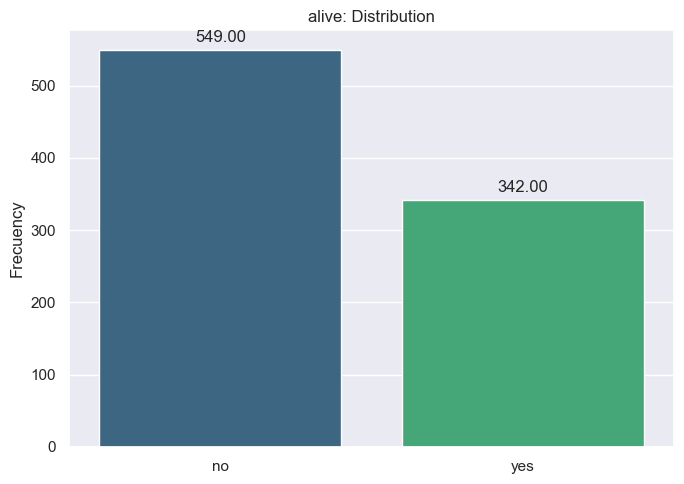

In [4]:
plot_multiple_categorical_distributions(df_titanic, ['alive'], 
                                        relative=False, show_values=True, rotation=0, palette='viridis')

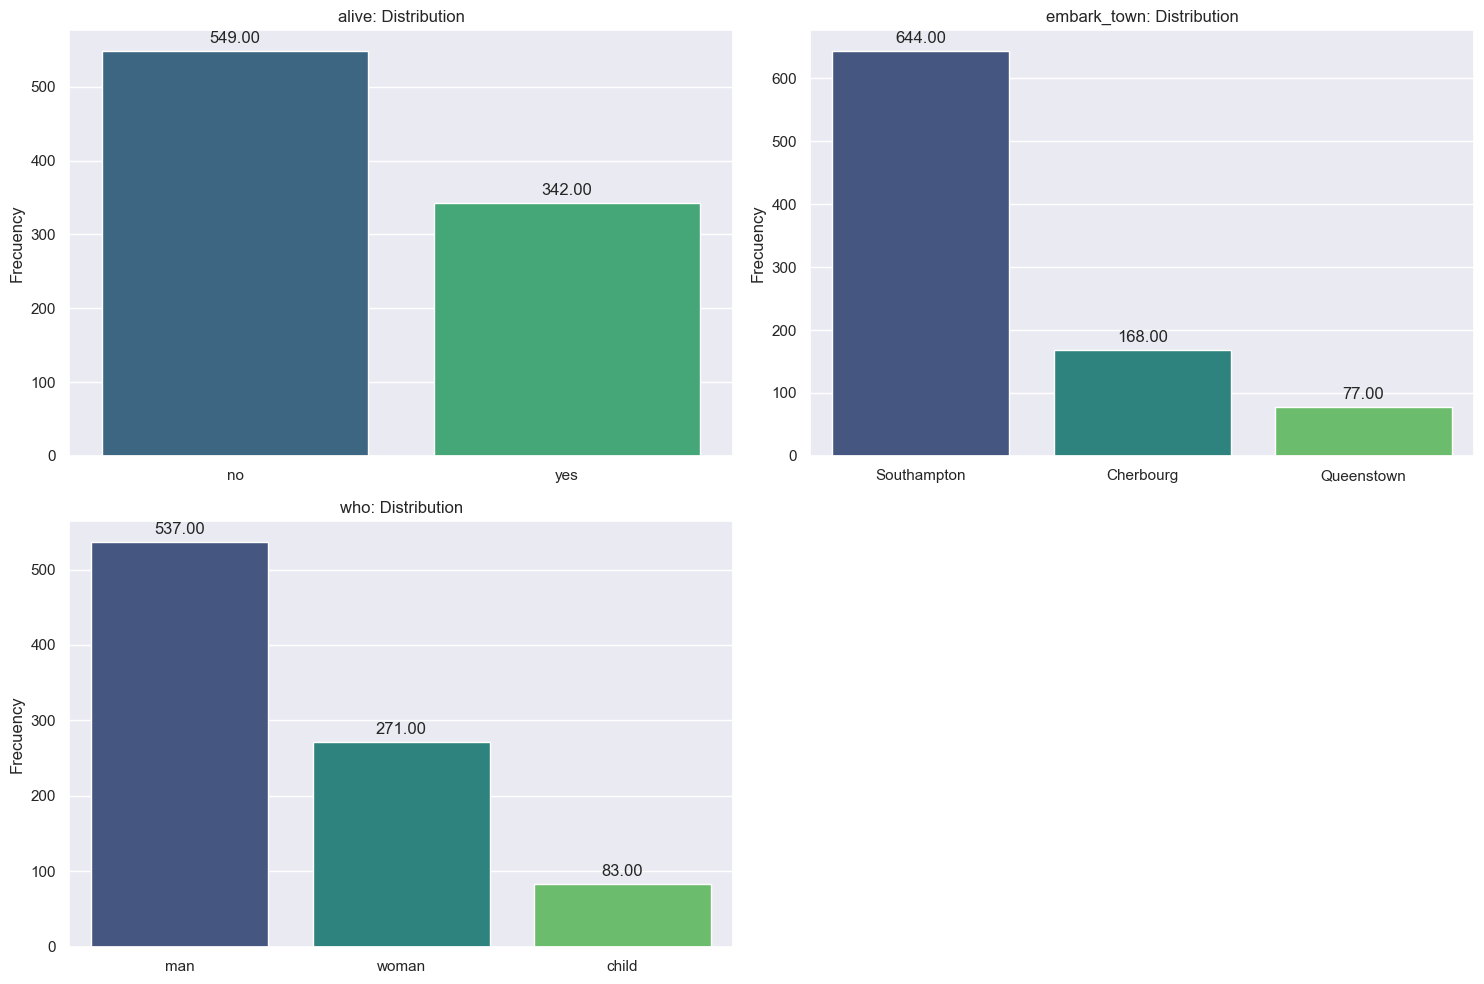

In [5]:
plot_multiple_categorical_distributions(df_titanic, ['alive', 'embark_town', 'who'], 
                                        relative=False, show_values=True, rotation=0, palette='viridis')

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [6]:
# Es la de la liberia bootcampviztools.py MODIFICADA

def plot_multiple_histograms_KDEs_boxplots(df, 
                                           columns, 
                                           *, 
                                           kde=True, 
                                           boxplot = True,
                                           whisker_width = 1.5,
                                           bins = None):
    '''
    Plot histogram, KDE and Box-Plots in one figure, using `plt.subplots()` and `"Seaborn"`
    
    Parameters
    ----------
    df : pandas.DataFrame
        `pandas.DataFrame` to evaluate.
    
    columns : list
        Numerical columns from `df`

    kde : bool, optional
        If True, plot the KDE. Default is True.

    boxplot : bool, optional
        If True, plot the boxplot. Default is True.
                
    whisker_width : float, optional
        Width of the whiskers. Default is 1.5.
    
    bins : None or str, number, vector, or a pair of such values, optional
        Number of bins for the groups. Default is "auto".
    '''
    num_columns = len(columns)
    if num_columns:
        if boxplot:
            fig, axs = plt.subplots(num_columns, 2, figsize=(12, 5 * num_columns))
        else:
            fig, axs = plt.subplots(num_columns, 1, figsize=(6, 5 * num_columns))

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histogram and KDE
                sns.histplot(df[column], kde=kde, ax=axs[i, 0] if boxplot and num_columns > 1 else axs[i], bins="auto" if not bins else bins[i])
                if boxplot:
                    if kde:
                        axs[i, 0].set_title(f'{column}: Histogram and KDE')
                    else:
                        axs[i, 0].set_title(f'{column}: Histogram')
                else:
                    if kde:
                        axs[i].set_title(f'{column}: Histogram and KDE')
                    else:
                        axs[i].set_title(f'{column}: Histogram')

                # Boxplot
                if boxplot:
                    sns.boxplot(x=df[column], ax=axs[i, 1] if num_columns > 1 else axs[i + num_columns], whis=whisker_width)
                    axs[i, 1].set_title(f'{column}: BoxPlot')

        plt.tight_layout()
        plt.show()

### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

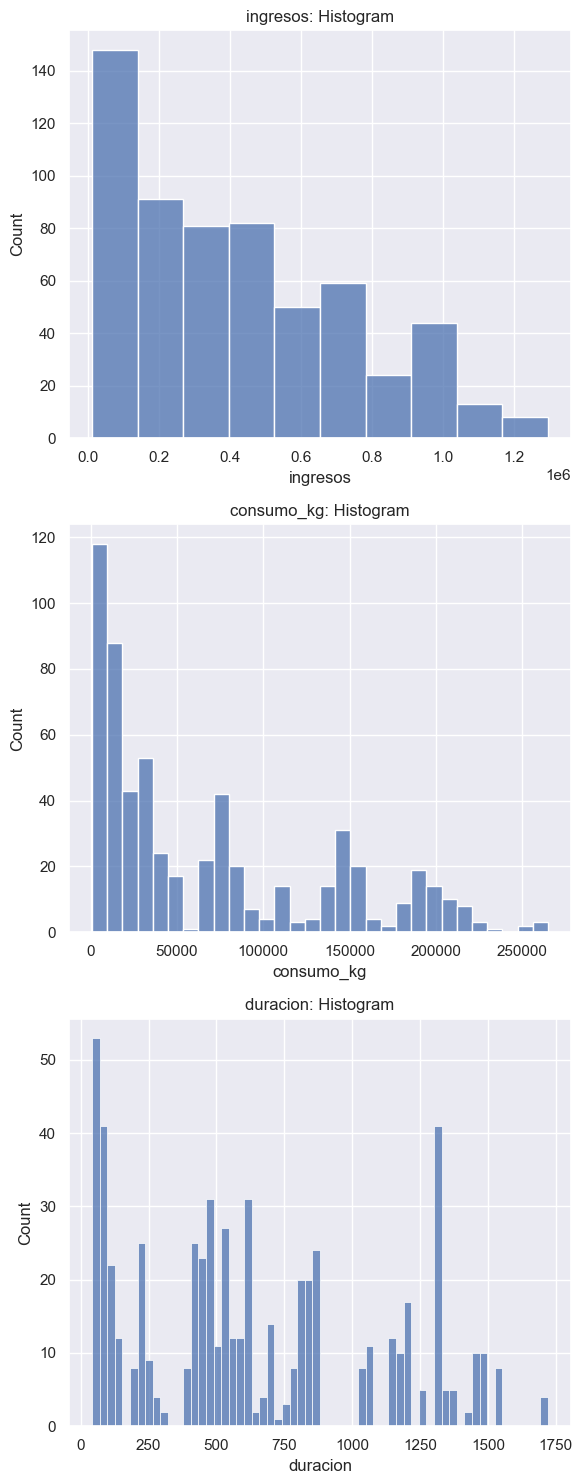

In [7]:
plot_multiple_histograms_KDEs_boxplots(df_viajes, ['ingresos', 'consumo_kg', 'duracion'], 
                                       kde = False, boxplot = False, whisker_width = 1.5, bins = [10, 30, 60])

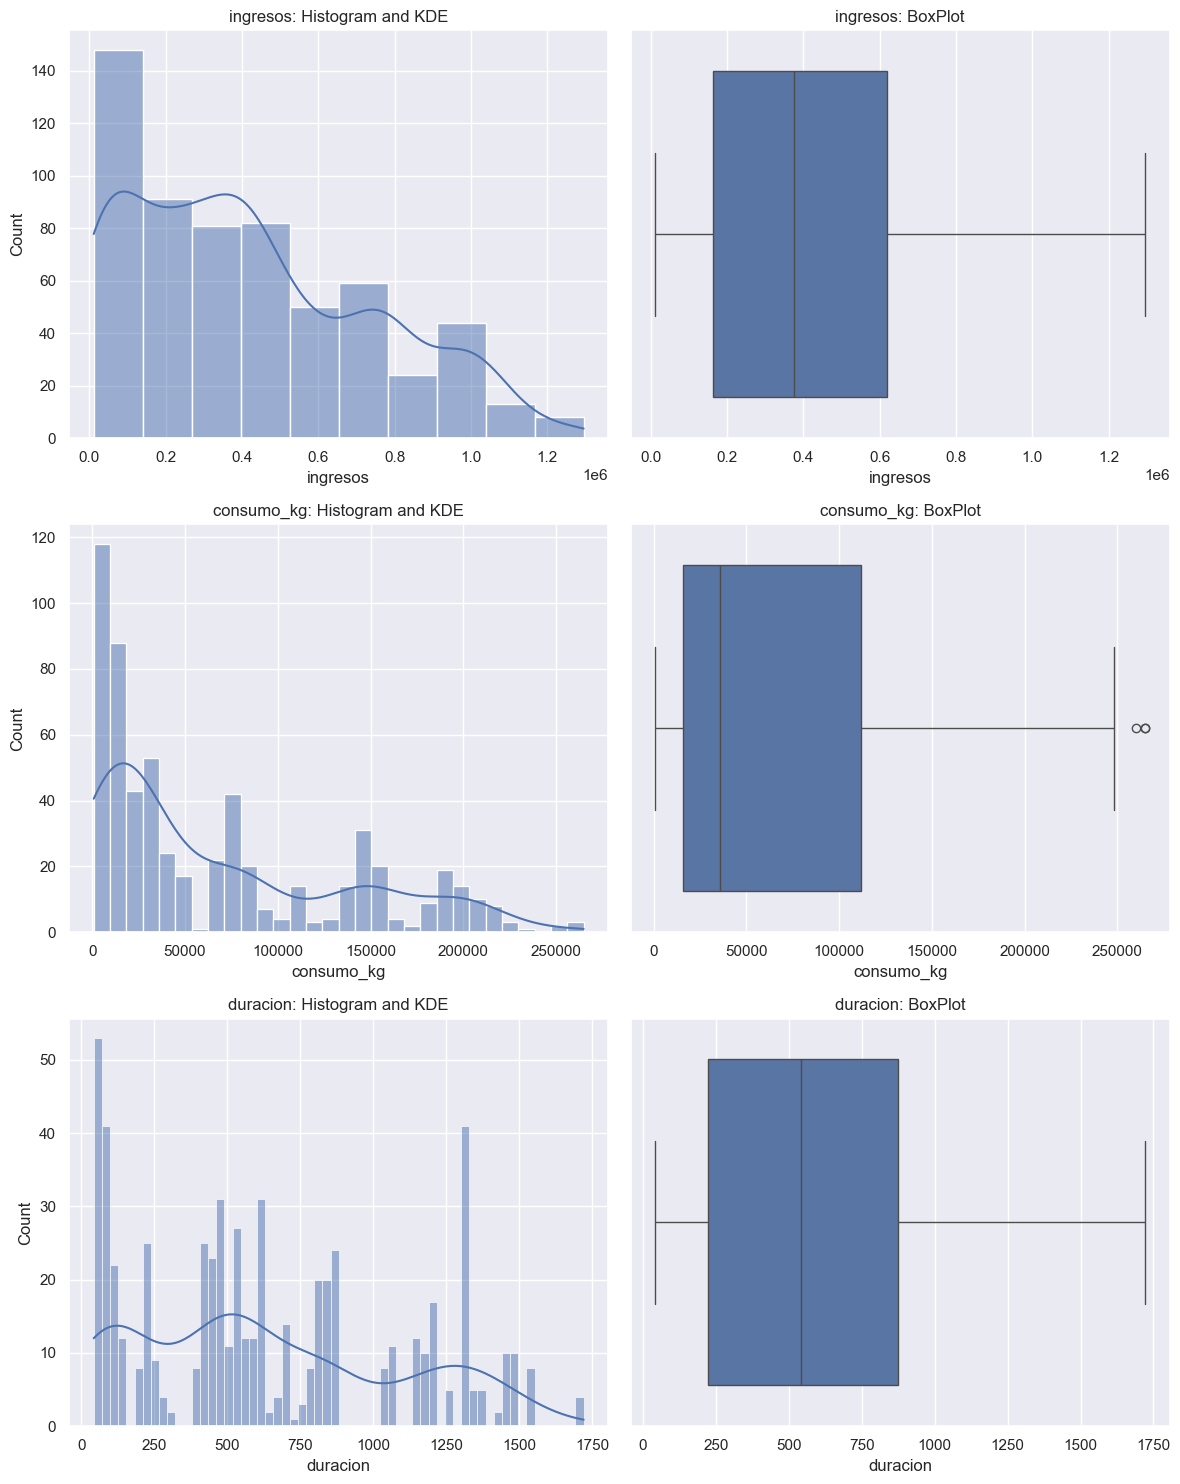

In [8]:
plot_multiple_histograms_KDEs_boxplots(df_viajes, ['ingresos', 'consumo_kg', 'duracion'], 
                                       kde = True, boxplot = True, whisker_width = 1.5, bins = [10, 30, 60])

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [9]:
# Función propia

def plot_multiple_lineplots(df, numerical_serie_columns) -> None:
    '''
    Lineplots of Serie-CAolumns in one figure.
    This function uses `plt.subplots()` and `Seaborn`

    Parameters
    ----------
    df : pandas.DataFrame
        pandas.DataFrame

    numerical_serie_columns : list
        This colums must be sorted and represent a serie (of dates for example)  
    '''
    num_columns = len(numerical_serie_columns)
    num_rows = (num_columns // 2) + (num_columns % 2)

    if num_columns == 1:
        fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    else:
        fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
        axs = axs.flatten()     # Return a copy of the array collapsed into one dimension.

    for i, col in enumerate(numerical_serie_columns):
        if num_columns > 1:
            ax = axs[i]
        
        sns.lineplot(x = df.index, y = df[col], data = df, ax=ax)

        ax.set_title(f'{col}: Line-Plot')
        ax.set_xlabel(f'{df.index.name}')
        ax.set_ylabel(f'{col}')

    for j in range(i + 1, num_rows * 2):
        if num_columns > 1:
            axs[j].axis('off')

    plt.tight_layout()
    plt.show()

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

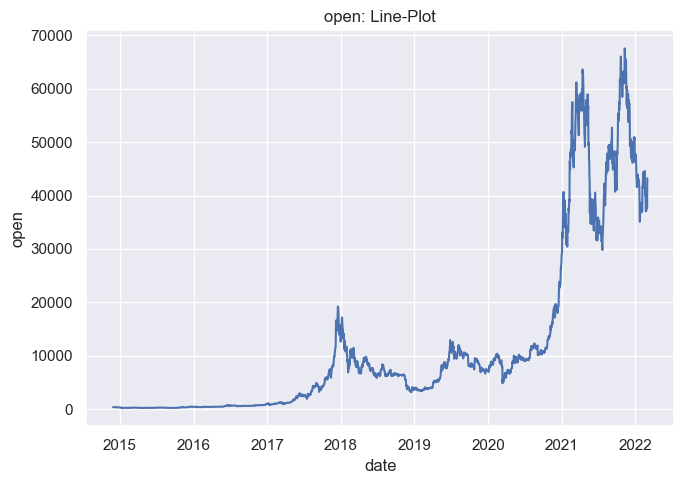

In [10]:
plot_multiple_lineplots(df_bitcoin, ['open'])

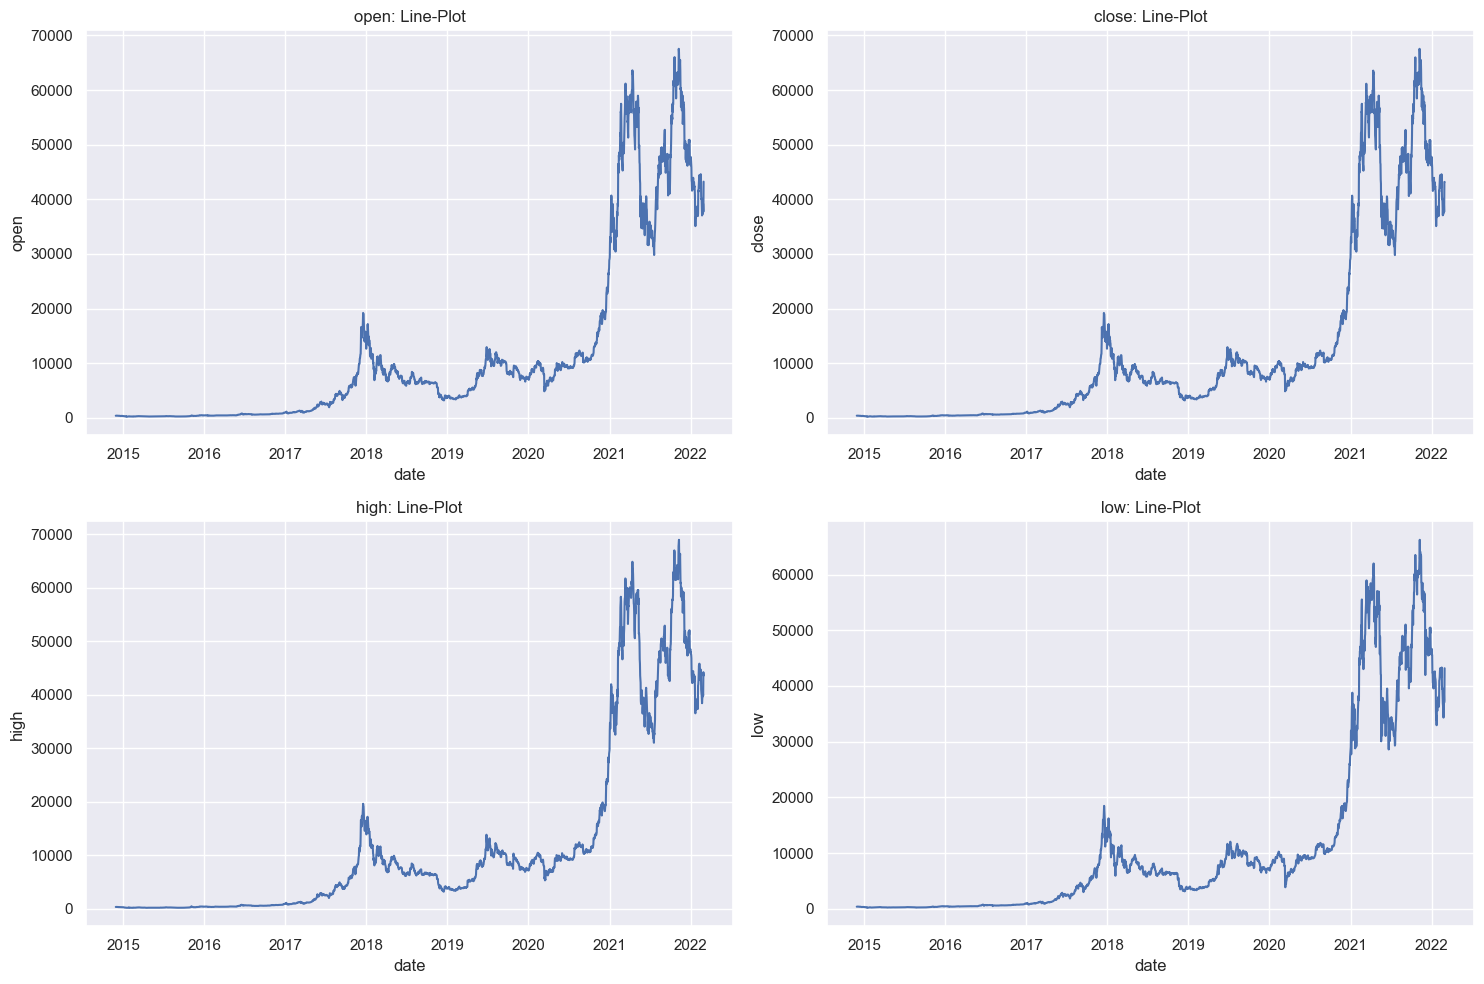

In [11]:
plot_multiple_lineplots(df_bitcoin, ['open', 'close', 'high', 'low']) # Parecen la misma gráfica pero no lo son


### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [12]:
# Función PROPIA

def plot_multiple_lineplots(df, 
                            numerical_serie_columns, 
                            *,
                            all_together = False, 
                            start_date = None, 
                            end_date = None
                            ) -> None:
    '''
    Lineplots of serie-style columns in the DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        pandas.DataFrame

    numerical_serie_columns : list
        These columns must be sorted and represent a serie (of dates for example)
    
    all_together : bool, optional
        If True, plot all lines in one plot with a legend. Default is False.

    start_date : str or pd.Timestamp, optional
        Start date for the plot. Default is None (use all data).

    end_date : str or pd.Timestamp, optional
        End date for the plot. Default is None (use all data).
    '''
    # Redefine dataframe
    if start_date:
        df = df[df.index >= pd.to_datetime(start_date)]
    if end_date:
        df = df[df.index <= pd.to_datetime(end_date)]

    num_columns = len(numerical_serie_columns)
    num_rows = (num_columns // 2) + (num_columns % 2)

    if all_together:
        fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        for col in numerical_serie_columns:
            sns.lineplot(x = df.index, y = df[col], data = df, ax = ax, label = col)
        ax.set_title('All Columns: Line-Plot')
        ax.set_xlabel(f'{df.index.name}')
        ax.set_ylabel('Values')
        ax.legend()
    else:
        if num_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(7, 5))
            sns.lineplot(x = df.index, y = df[numerical_serie_columns[0]], data = df, ax = ax)
            ax.set_title(f'{numerical_serie_columns[0]}: Line-Plot')
            ax.set_xlabel(f'{df.index.name}')
            ax.set_ylabel(f'{numerical_serie_columns[0]}')
        else:
            fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
            axs = axs.flatten()  # Return a copy of the array collapsed into one dimension.

            for i, col in enumerate(numerical_serie_columns):
                ax = axs[i]
                sns.lineplot(x = df.index, y = df[col], data = df, ax = ax)
                ax.set_title(f'{col}: Line-Plot')
                ax.set_xlabel(f'{df.index.name}')
                ax.set_ylabel(f'{col}')

            for j in range(i + 1, num_rows * 2):
                axs[j].axis('off')

    plt.tight_layout()
    plt.show()

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

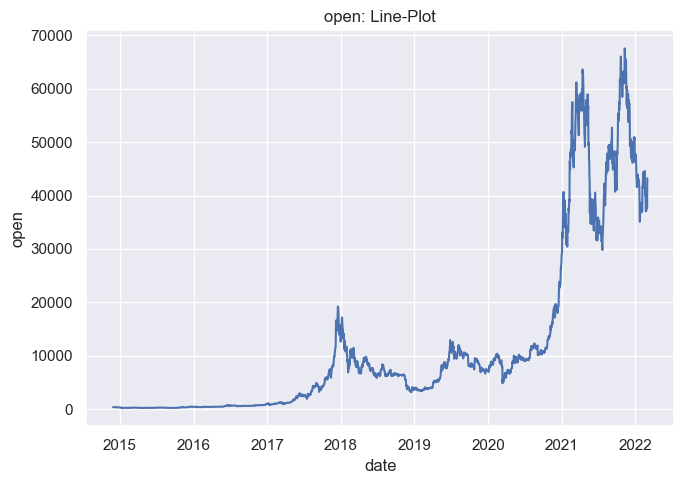

In [13]:
plot_multiple_lineplots(df_bitcoin, ['open'], 
                        all_together = False, start_date = None, end_date = None)

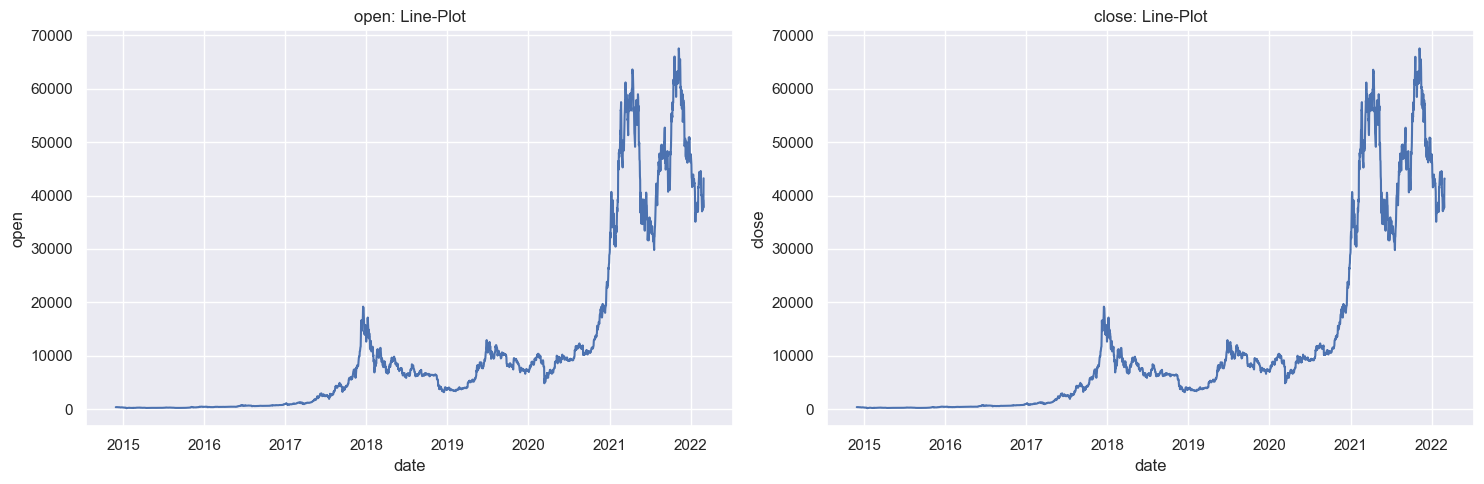

In [14]:
plot_multiple_lineplots(df_bitcoin, ['open', 'close'], 
                        all_together = False, start_date = None, end_date = None)

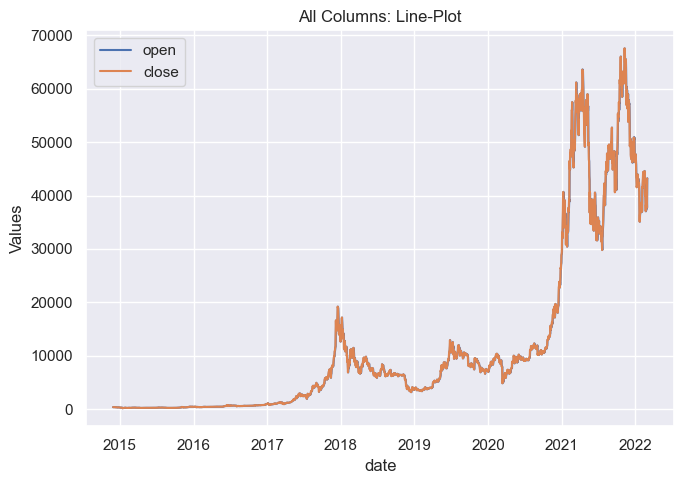

In [15]:
plot_multiple_lineplots(df_bitcoin, ['open', 'close'], 
                        all_together = True, start_date = None, end_date = None)

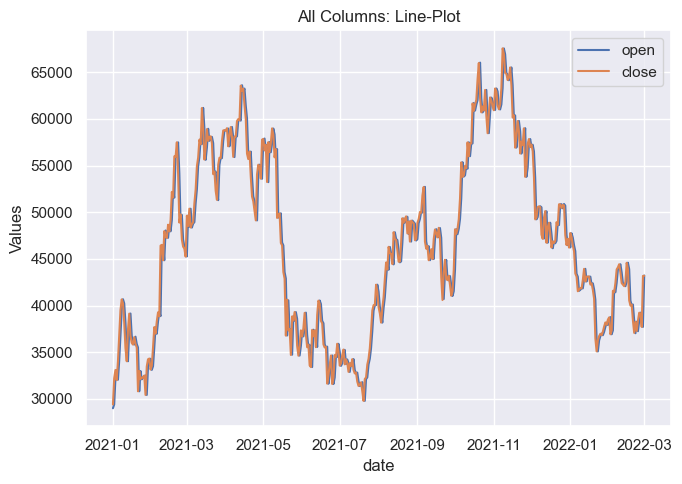

In [16]:
plot_multiple_lineplots(df_bitcoin, ['open', 'close'], 
                        all_together = True, start_date = '2021-01-01', end_date = None)

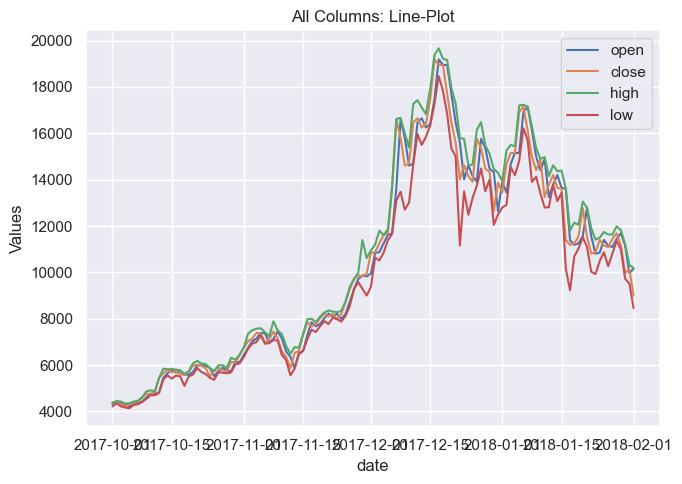

In [17]:
plot_multiple_lineplots(df_bitcoin, ['open', 'close', 'high', 'low'], 
                        all_together = True, start_date = '2017-10-01', end_date = '2018-02-01')